# (Micro)Relatório do catálogo da Netflix

Este (micro)relatório apresenta algumas informações extraídas de um dataset com o [catálogo da Netflix](https://www.kaggle.com/shivamb/netflix-shows), disponível no [Kaggle](https://www.kaggle.com/).

As bibliotecas utilizadas são as seguintes:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## Passo 1: carregar o dataset

In [8]:
df = pd.read_csv("netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


Nosso dataset contém 6234 elementos, com 12 atributos cada, além de possuir missing data.
Dentre os atributos existentes pra cada elemento do catálogo, vamos focar apenas nos seguintes (uma vez que esse é apenas um exemplo):

* `type` - o tipo da obra (série ou filme)
* `release_year` - ano de lançamento da obra
* `date_added`- data de lançamento da obra
* `director` - diretor da obra

## Análises

Agora que o dado está carregado e identificamos (algum)as informações importantes, podemos começar as análises

### Contagem de tipos de obras

Uma coisa que podemos nos perguntar, nesse dataset, é se na Netflix existem mais filmes ou séries. Para descobrir isso, basta selecionarmos a série `type`, realizar uma contagem dos valores e desenhar um gráfico de barras

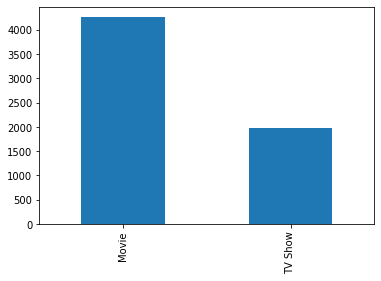

In [13]:
df.type.value_counts().plot(kind="bar")

## Adições ao passar do tempo

Outra informação interessante de se obter é analisar a "idade" dos conteúdos (ou seja, o quão antigos eles são) e quanta sadições são feitas por dia. Para isso, precisamos de dois gráficos:

* o primeiro faz uma contagem do ano de produção das obras. Como este (micro)relatório foi escrito em meados de 2020, é injusto comparar os dados desse ano com os restantes. Logo, iremos filtrar os dados para apenas os de 2019 ou antes. Em seguida, fazemos a contagem dos elementos

* o segundo é análogo ao anterior, porém não precisamos fazer o corte do ano de 2020, visto que a ideia é analisar as adições por dia. Logo, basta fazer a contagem pelas datas. Porém,temos dois problemas:
    - uma mesma data pode estar escrita de maneira diferente ('September 9, 2019' e ' Semptember 9, 2019'), logo realizar uma simples contagem não será o suficiente;
    - as "datas" são strings. Precisamos transformá-las para datas.

Text(0.5, 1.0, 'Data em que foi adicionado')

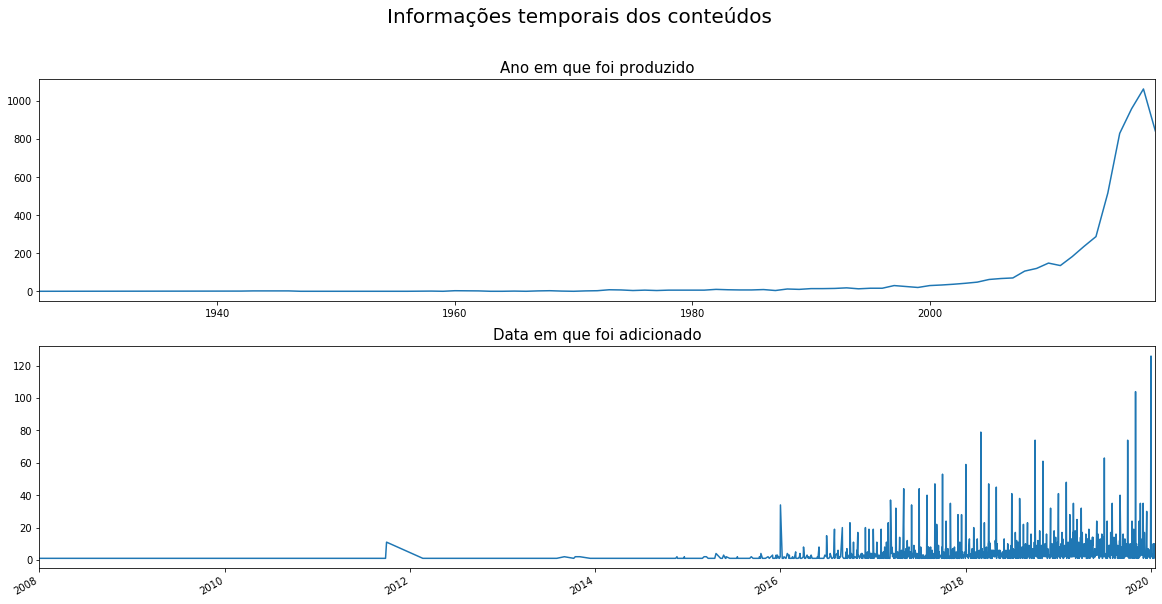

In [10]:
# para apresentar os dois gráficos juntos, precisamos primeiro criar uma figura
fig = plt.figure(1, figsize=(20,10))
# podemos também dar um título a essa figura
fig.suptitle("Informações temporais dos conteúdos", fontsize=20)

# para apresentar diversos gráficos em uma mesma figura, precisamos criar "sub-gráficos", que serão dispostos
# como uma tabela.
# para criar um sub-gráfico, utilizamos a função plt.subplot(linhas, colunas, opsição)
plt.subplot(2,1,1)
# temos de ordenar a série temporal gerada a partir dos anos (que, nesse caso, são os índices)
year_count = df.release_year.value_counts().sort_index()
years_before_2020 = year_count.index < 2020
ax = year_count[years_before_2020].plot()
ax.set_title("Ano em que foi produzido", fontsize=15)

plt.subplot(2,1,2)
#para processar a data, precisamos da biblioteca datetime
from datetime import datetime
# primeiramente, vamos remover todos os dados que não possuem data definida
#depois vamos fazer o parser das datas
dates = df.date_added\
.dropna()\
.apply(lambda d: datetime.strptime(d.strip(), '%B %d, %Y')) 

ax = dates.value_counts().sort_index().plot(ax=plt.gca())
ax.set_title("Data em que foi adicionado", fontsize=15)

### Diretores mais prestigiados

Por último, podemos identificar quais os diretores que possuem mais obras no catálogo. Para isso, realizamos a contagem dos diretores. Por padrão, o `value_counts()` já ordena a série em ordem decrescente de valor. Como são muitas obras e muitos diretores, vamos nos atentar apenas aos top 10 diretores mais prestigiados

In [15]:
df.director.value_counts().head(10).sort_values().plot(kind="bar")

Ryan Polito                7
Johnnie To                 8
David Dhawan               8
Lance Bangs                8
Martin Scorsese            9
Steven Spielberg           9
Jay Chapman               12
Jay Karas                 13
Marcus Raboy              14
Raúl Campos, Jan Suter    18
Name: director, dtype: int64